# Apartment for Rent classified
- Dataset Information

- The dataset contains of 10'000 or 100'000 rows and of 22 columns The data has been cleaned in the way that 
column price and square_feet never is empty but the dataset is saved as it was created.

- Can be used for different machine learning tasks such as clustering, classification and also regression for the squares feet column

### Importing Packages

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler

### Loading Dataset

In [4]:
df = pd.read_csv('apartments_for_rent_classified_10K.csv',delimiter=';',encoding='cp1252')
df.head()

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,5668626895,housing/rent/apartment,"Studio apartment 2nd St NE, Uhland Terrace NE,...","This unit is located at second St NE, Uhland T...",NaN,NaN,0.0,USD,No,Thumbnail,...,$790,Monthly,101,NaN,Washington,DC,38.9057,-76.9861,RentLingo,1577359415
1,5664597177,housing/rent/apartment,Studio apartment 814 Schutte Road,"This unit is located at 814 Schutte Road, Evan...",NaN,NaN,1.0,USD,No,Thumbnail,...,$425,Monthly,106,814 Schutte Rd,Evansville,IN,37.9680,-87.6621,RentLingo,1577017063
2,5668626833,housing/rent/apartment,"Studio apartment N Scott St, 14th St N, Arling...","This unit is located at N Scott St, 14th St N,...",NaN,1.0,0.0,USD,No,Thumbnail,...,"$1,390",Monthly,107,NaN,Arlington,VA,38.8910,-77.0816,RentLingo,1577359410
3,5659918074,housing/rent/apartment,Studio apartment 1717 12th Ave,"This unit is located at 1717 12th Ave, Seattle...",NaN,1.0,0.0,USD,No,Thumbnail,...,$925,Monthly,116,1717 12th Avenue,Seattle,WA,47.6160,-122.3275,RentLingo,1576667743
4,5668626759,housing/rent/apartment,"Studio apartment Washington Blvd, N Cleveland ...","This unit is located at Washington Blvd, N Cle...",NaN,NaN,0.0,USD,No,Thumbnail,...,$880,Monthly,125,NaN,Arlington,VA,38.8738,-77.1055,RentLingo,1577359401


## Exploratory Data Analysis
- Information about dataset 
- Describing Dataset 
- Checking for Categorical Columns
- Checking for N-Unique values 
- Checking for value counts
- Checking for the correlations (if possible)
- Splitting into features and label
- Plotting Featurev vs Label

## Exploratory Data Analysis

### Information about dataset 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             10000 non-null  int64  
 1   category       10000 non-null  object 
 2   title          10000 non-null  object 
 3   body           10000 non-null  object 
 4   amenities      6451 non-null   object 
 5   bathrooms      9966 non-null   float64
 6   bedrooms       9993 non-null   float64
 7   currency       10000 non-null  object 
 8   fee            10000 non-null  object 
 9   has_photo      10000 non-null  object 
 10  pets_allowed   8252 non-null   object 
 11  price          10000 non-null  int64  
 12  price_display  10000 non-null  object 
 13  price_type     10000 non-null  object 
 14  square_feet    10000 non-null  int64  
 15  address        6673 non-null   object 
 16  cityname       9923 non-null   object 
 17  state          9923 non-null   object 
 18  latitud

### Describing Dataset 

In [6]:
df.describe()

,id,bathrooms,bedrooms,price,square_feet,latitude,longitude,time
count,1.000000e+04,9966.000000,9993.000000,10000.000000,10000.000000,9990.000000,9990.000000,1.000000e+04
mean,5.623396e+09,1.380544,1.744021,1486.277500,945.810500,37.695162,-94.652247,1.574891e+09
std,7.021025e+07,0.615410,0.942354,1076.507968,655.755736,5.495851,15.759805,3.762395e+06
min,5.508654e+09,1.000000,0.000000,200.000000,101.000000,21.315500,-158.022100,1.568744e+09
25%,5.509248e+09,1.000000,1.000000,949.000000,649.000000,33.679850,-101.301700,1.568781e+09
50%,5.668610e+09,1.000000,2.000000,1270.000000,802.000000,38.809800,-93.651600,1.577358e+09
75%,5.668626e+09,2.000000,2.000000,1695.000000,1100.000000,41.349800,-82.209975,1.577359e+09
max,5.668663e+09,8.500000,9.000000,52500.000000,40000.000000,61.594000,-70.191600,1.577362e+09


### Checking Categorical columns 

In [7]:
df_categorical = df.select_dtypes('object')
print(df_categorical.columns)

Index(['category', 'title', 'body', 'amenities', 'currency', 'fee',
       'has_photo', 'pets_allowed', 'price_display', 'price_type', 'address',
       'cityname', 'state', 'source'],
      dtype='object')


### Checking for N-unique values 

In [8]:
df.nunique()

id               10000
category             3
title             9350
body              9961
amenities         2254
bathrooms           14
bedrooms            10
currency             1
fee                  1
has_photo            3
pets_allowed         4
price             1725
price_display     1726
price_type           3
square_feet       1738
address           6658
cityname          1574
state               51
latitude          2395
longitude         2392
source              12
time              6310
dtype: int64

### Checking for Values count

In [9]:
df_categorical.value_counts()

category                title                                                 body                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        amenities                                     

### Checking for NaN values

In [10]:
df.isnull().sum()

id                  0
category            0
title               0
body                0
amenities        3549
bathrooms          34
bedrooms            7
currency            0
fee                 0
has_photo           0
pets_allowed     1748
price               0
price_display       0
price_type          0
square_feet         0
address          3327
cityname           77
state              77
latitude           10
longitude          10
source              0
time                0
dtype: int64

### Plotting Price vs Square Feet

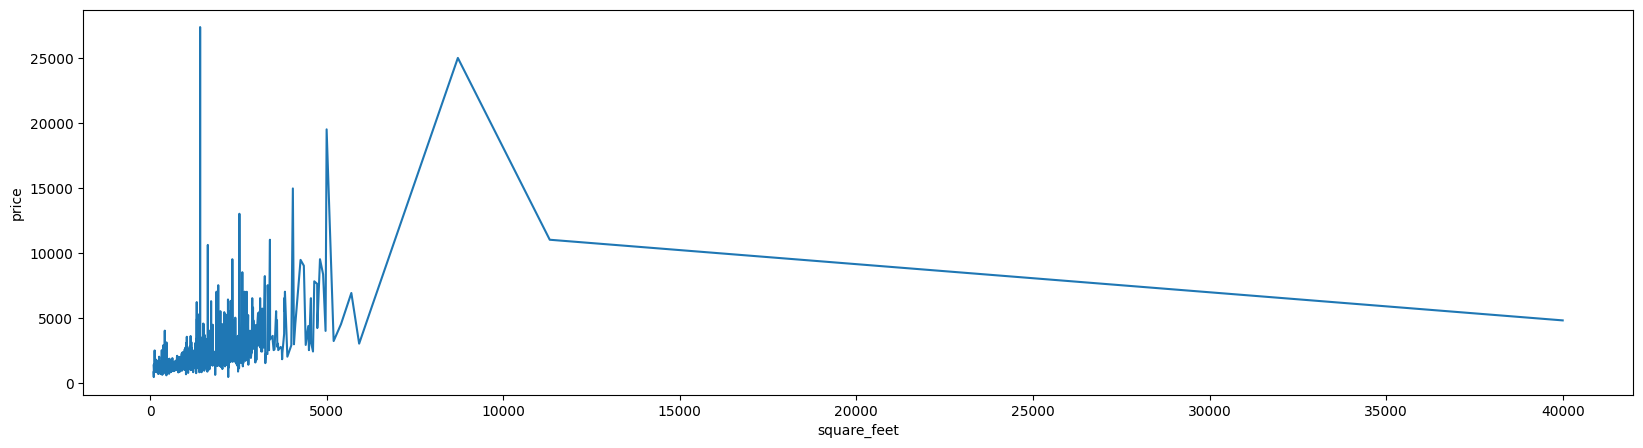

In [11]:
plt.figure(figsize=(20,5))
avg_sqrFeet_price = df.groupby('square_feet')['price'].mean().reset_index()
avg_price_sqrFeet  = avg_sqrFeet_price.sort_values(by='price',ascending=False)
sns.lineplot(x='square_feet',y='price',data=avg_price_sqrFeet)
plt.show()

### Plotting City name vs Price

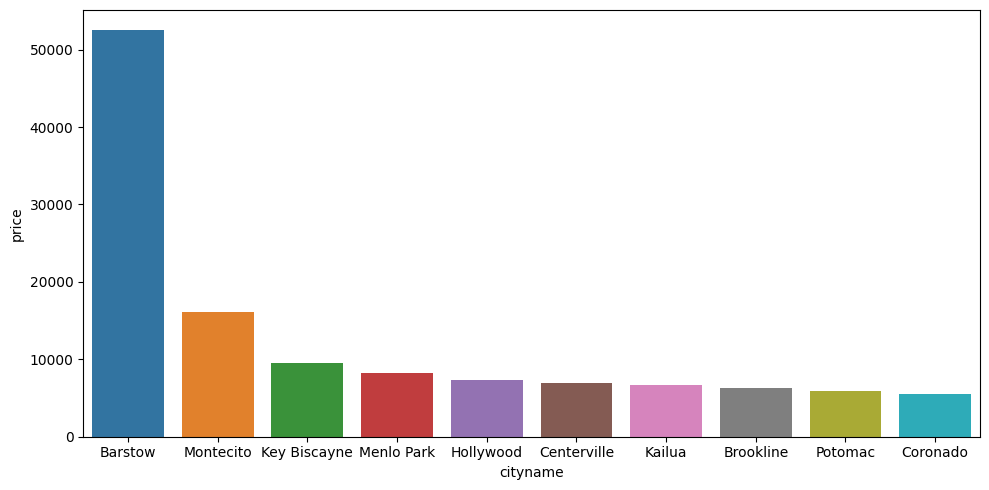

In [12]:
plt.figure(figsize=(10,5))
avg_price_by_city = df.groupby('cityname')['price'].mean().reset_index()
avg_city_by_price = avg_price_by_city.sort_values(by='price',ascending=False)
sns.barplot(x='cityname',y='price',data=avg_city_by_price.head(10))
plt.tight_layout()
plt.show()

### Plotting States vs price

[]

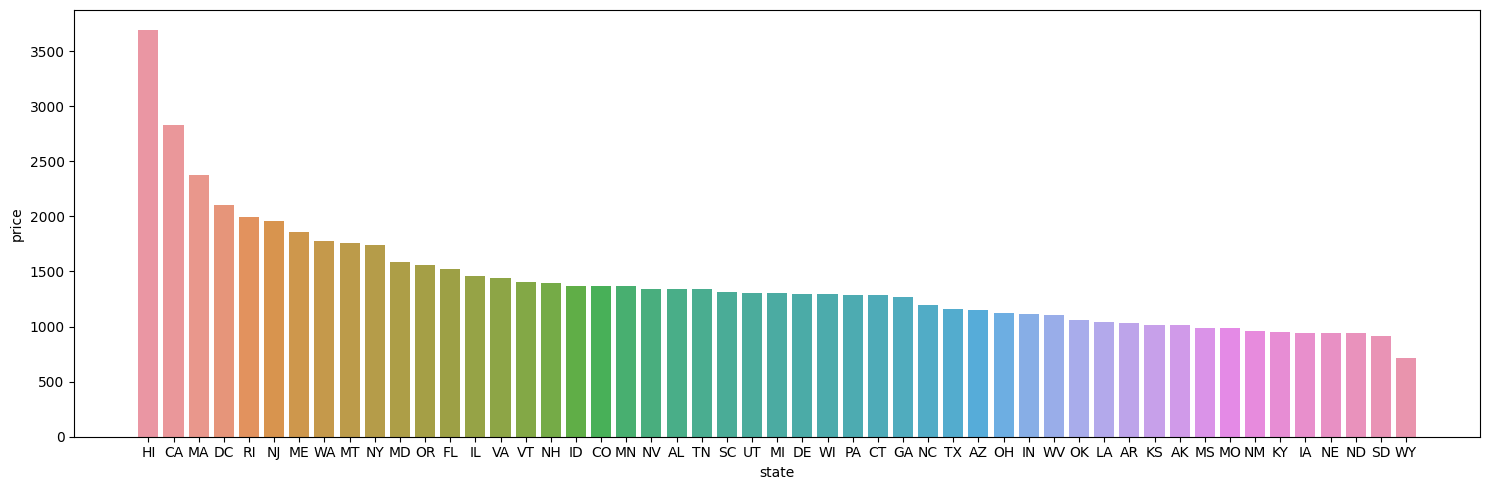

In [13]:
plt.figure(figsize=(15,5))
state_mean_price = df.groupby('state')['price'].mean().reset_index()
avg_state_price = state_mean_price.sort_values(by='price',ascending=False)
sns.barplot(x='state',y='price',data=avg_state_price)
plt.tight_layout()
plt.plot()

### Splitting Features and Label
- Dropping featuers: Body, Title, Address (Reason: It mostly has unique values for most of the instances which defines that mostly each instance has unique value which cannot contribute in training of machine learning model)

In [14]:
df_features = df.drop(["square_feet",'body','title','address','id'],axis=1)
df_label = df[['square_feet']]
print(df_features.info())
print(df_label.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   category       10000 non-null  object 
 1   amenities      6451 non-null   object 
 2   bathrooms      9966 non-null   float64
 3   bedrooms       9993 non-null   float64
 4   currency       10000 non-null  object 
 5   fee            10000 non-null  object 
 6   has_photo      10000 non-null  object 
 7   pets_allowed   8252 non-null   object 
 8   price          10000 non-null  int64  
 9   price_display  10000 non-null  object 
 10  price_type     10000 non-null  object 
 11  cityname       9923 non-null   object 
 12  state          9923 non-null   object 
 13  latitude       9990 non-null   float64
 14  longitude      9990 non-null   float64
 15  source         10000 non-null  object 
 16  time           10000 non-null  int64  
dtypes: float64(4), int64(2), object(11)
memory usage: 1

## Data Preprocessing
- Encoding 
- Checking for an outliers
- Removing outliers
- Finding missing values
- Standard Scaler
- train test split

In [15]:
df_categorical = df_features.select_dtypes('object')
print(df_categorical.head(10))

                 category                                    amenities  \
0  housing/rent/apartment                                          NaN   
1  housing/rent/apartment                                          NaN   
2  housing/rent/apartment                                          NaN   
3  housing/rent/apartment                                          NaN   
4  housing/rent/apartment                                          NaN   
5  housing/rent/apartment  Dishwasher,Elevator,Patio/Deck,Pool,Storage   
6  housing/rent/apartment                                          NaN   
7  housing/rent/apartment                                          NaN   
8  housing/rent/apartment                                 Refrigerator   
9  housing/rent/apartment                                          NaN   

  currency fee  has_photo pets_allowed price_display price_type  \
0      USD  No  Thumbnail         None          $790    Monthly   
1      USD  No  Thumbnail         None          $42

### Encoding on categical features

In [20]:
encoder = OrdinalEncoder()
df_features_encoded = encoder.fit_transform(df_features)
df_features_encoded = pd.DataFrame(df_features_encoded,columns=df_features.columns)
print(df_features_encoded.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   category       10000 non-null  float64
 1   amenities      6451 non-null   float64
 2   bathrooms      9966 non-null   float64
 3   bedrooms       9993 non-null   float64
 4   currency       10000 non-null  float64
 5   fee            10000 non-null  float64
 6   has_photo      10000 non-null  float64
 7   pets_allowed   8252 non-null   float64
 8   price          10000 non-null  float64
 9   price_display  10000 non-null  float64
 10  price_type     10000 non-null  float64
 11  cityname       9923 non-null   float64
 12  state          9923 non-null   float64
 13  latitude       9990 non-null   float64
 14  longitude      9990 non-null   float64
 15  source         10000 non-null  float64
 16  time           10000 non-null  float64
dtypes: float64(17)
memory usage: 1.3 MB
None


### Checking for an outliers
- Data has few number of outliers so removing outliers doesnt required

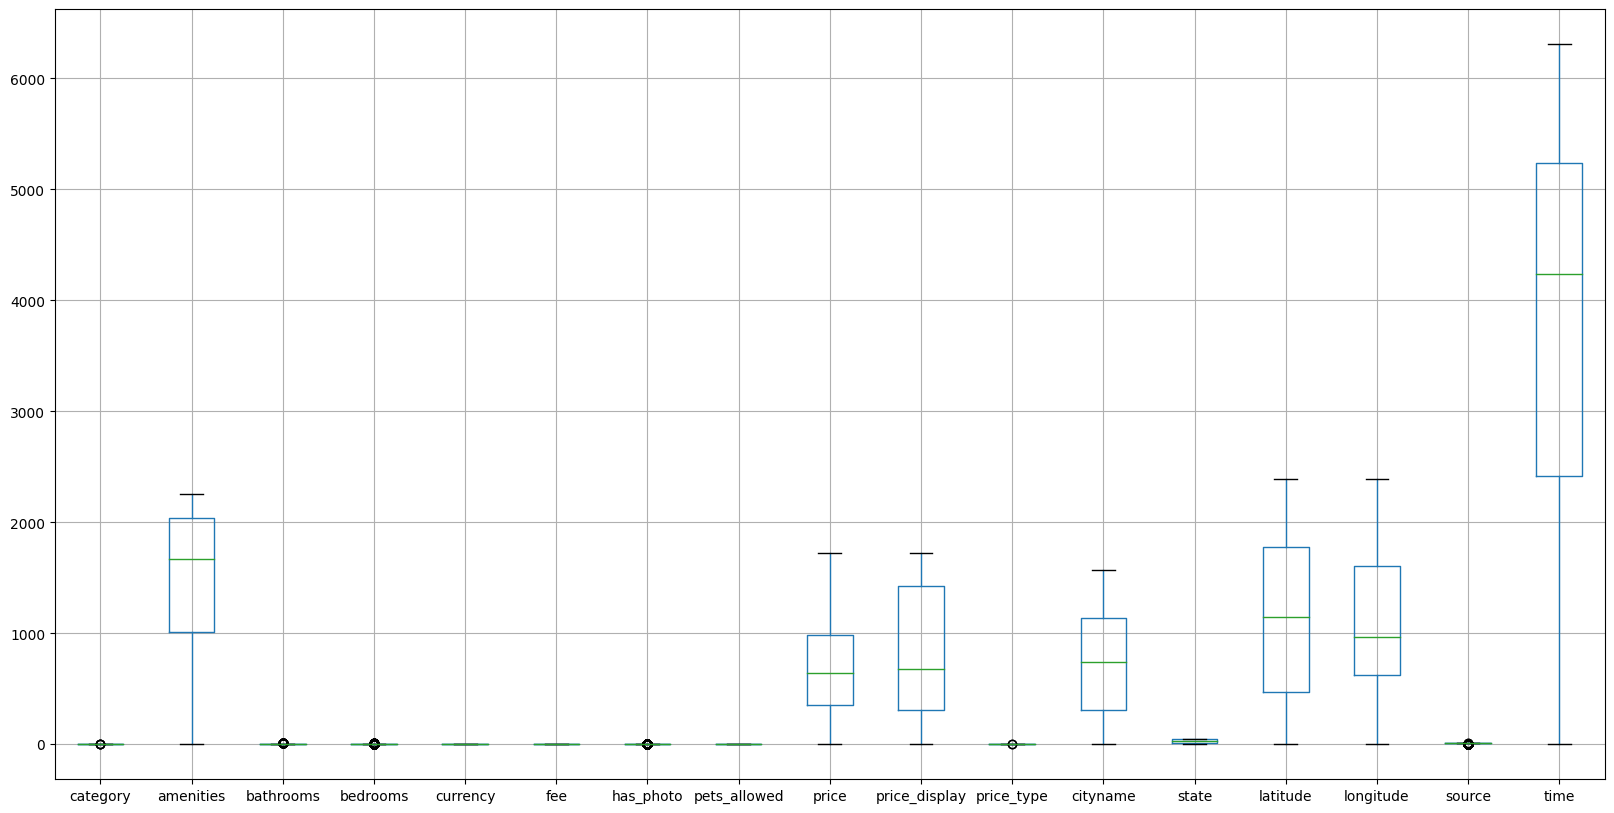

In [24]:
plt.figure(figsize=(20,10))
df_features_encoded.boxplot()
plt.show()

### Checking for missing values

In [25]:
print(df_features_encoded.isnull().sum())

category            0
amenities        3549
bathrooms          34
bedrooms            7
currency            0
fee                 0
has_photo           0
pets_allowed     1748
price               0
price_display       0
price_type          0
cityname           77
state              77
latitude           10
longitude          10
source              0
time                0
dtype: int64


### Handling missing values

In [30]:
imputer = SimpleImputer()
df_features_noNaN = imputer.fit_transform(df_features_encoded)
df_features_noNaN = pd.DataFrame(df_features_noNaN,columns=df_features.columns)
df_features_noNaN.head()

,category,amenities,bathrooms,bedrooms,currency,fee,has_photo,pets_allowed,price,price_display,price_type,cityname,state,latitude,longitude,source,time
0,0.0,1461.164626,0.760486,0.0,0.0,0.0,1.0,3.0,207.0,1528.0,0.0,1468.0,7.0,1177.0,1987.0,9.0,5275.0
1,0.0,1461.164626,0.760486,1.0,0.0,0.0,1.0,3.0,16.0,1293.0,0.0,449.0,15.0,1080.0,1205.0,9.0,3941.0
2,0.0,1461.164626,0.000000,0.0,0.0,0.0,1.0,3.0,738.0,343.0,0.0,52.0,45.0,1173.0,1967.0,9.0,5271.0
3,0.0,1461.164626,0.000000,0.0,0.0,0.0,1.0,3.0,329.0,1660.0,0.0,1285.0,47.0,2343.0,79.0,9.0,3157.0
4,0.0,1461.164626,0.760486,0.0,0.0,0.0,1.0,3.0,287.0,1614.0,0.0,52.0,45.0,1165.0,1963.0,9.0,5263.0


### Standard Scaler

In [31]:
scaler = StandardScaler()
df_features_scaler = scaler.fit_transform(df_features_noNaN)
df_features_scaler = pd.DataFrame(df_features_scaler,columns=df_features.columns)
df_features_scaler.head()

,category,amenities,bathrooms,bedrooms,currency,fee,has_photo,pets_allowed,price,price_display,price_type,cityname,state,latitude,longitude,source,time
0,-0.018977,1.618126e-13,-1.815938e-16,-1.851447,0.0,0.0,-0.224766,1.646216,-1.148794,1.256019,-0.013418,1.636762,-1.269347,0.037633,1.388788,0.419535,0.852435
1,-0.018977,1.618126e-13,-1.815938e-16,-0.789850,0.0,0.0,-0.224766,1.646216,-1.600486,0.842347,-0.013418,-0.611353,-0.746678,-0.095841,0.202648,0.419535,0.094807
2,-0.018977,1.618126e-13,-6.219448e-01,-1.851447,0.0,0.0,-0.224766,1.646216,0.106955,-0.829940,-0.013418,-1.487214,1.213329,0.032129,1.358452,0.419535,0.850164
3,-0.018977,1.618126e-13,-6.219448e-01,-1.851447,0.0,0.0,-0.224766,1.646216,-0.860279,1.488379,-0.013418,1.233028,1.343997,1.642073,-1.505272,0.419535,-0.350456
4,-0.018977,1.618126e-13,-1.815938e-16,-1.851447,0.0,0.0,-0.224766,1.646216,-0.959604,1.407405,-0.013418,-1.487214,1.213329,0.021120,1.352385,0.419535,0.845620


### Train test split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(df_features_scaler,df_label,test_size=0.2,random_state=42)
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(8000, 17) (2000, 17)
(8000, 1) (2000, 1)


### `NOTE:` For more projects visit: github.com/itechdp